In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import os
import sys


root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_dir)

from utils.utils import *
from utils.constant import *

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
# Set a seed for reproducibility
np.random.seed(42)


In [2]:
file_path = get_absolute_path(
    'small_set_sales_by_date_sku_zip.csv',
    'data',
    PROJECT_BASE_DIR
)

data = pd.read_csv(file_path)

In [3]:
# data = data[data.PRODUCT_MERCH_CLASSIFICATION3 == 'Dry Food']
data.head(3)

,ORDER_PLACED_DTTM,PRODUCT_PART_NUMBER,CUSTOMER_ADDRESS_ZIP,PRODUCT_CATEGORY_LEVEL1,PRODUCT_CATEGORY_LEVEL2,PRODUCT_CATEGORY_LEVEL3,PRODUCT_MERCH_CLASSIFICATION1,PRODUCT_MERCH_CLASSIFICATION2,PRODUCT_MERCH_CLASSIFICATION3,NET_SALES,UNITS
0,2022-11-22,100112,1028.0,Cat,Food,Dry Food,Consumables,Core Food,Dry Food,0.00,1.0
1,2022-11-22,100112,2152.0,Cat,Food,Dry Food,Consumables,Core Food,Dry Food,6.47,1.0
2,2022-11-22,100112,2813.0,Cat,Food,Dry Food,Consumables,Core Food,Dry Food,6.47,1.0


In [4]:
### Basic Information about the Datasets

# Display basic information about the dataset
print(data.info())

# Display summary statistics for numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7417129 entries, 0 to 7417128
Data columns (total 11 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   ORDER_PLACED_DTTM              object 
 1   PRODUCT_PART_NUMBER            int64  
 2   CUSTOMER_ADDRESS_ZIP           float64
 3   PRODUCT_CATEGORY_LEVEL1        object 
 4   PRODUCT_CATEGORY_LEVEL2        object 
 5   PRODUCT_CATEGORY_LEVEL3        object 
 6   PRODUCT_MERCH_CLASSIFICATION1  object 
 7   PRODUCT_MERCH_CLASSIFICATION2  object 
 8   PRODUCT_MERCH_CLASSIFICATION3  object 
 9   NET_SALES                      float64
 10  UNITS                          float64
dtypes: float64(3), int64(1), object(7)
memory usage: 622.5+ MB
None
       PRODUCT_PART_NUMBER  CUSTOMER_ADDRESS_ZIP     NET_SALES         UNITS
count         7.417129e+06          7.410835e+06  7.417128e+06  7.417128e+06
mean          1.469925e+05          4.690795e+04  3.953494e+01  1.782263e+00
std           3

In [5]:
data.columns

Index(['ORDER_PLACED_DTTM', 'PRODUCT_PART_NUMBER', 'CUSTOMER_ADDRESS_ZIP',
       'PRODUCT_CATEGORY_LEVEL1', 'PRODUCT_CATEGORY_LEVEL2',
       'PRODUCT_CATEGORY_LEVEL3', 'PRODUCT_MERCH_CLASSIFICATION1',
       'PRODUCT_MERCH_CLASSIFICATION2', 'PRODUCT_MERCH_CLASSIFICATION3',
       'NET_SALES', 'UNITS'],
      dtype='object')

In [6]:
print(data.groupby('PRODUCT_CATEGORY_LEVEL1')['UNITS'].sum())
print(data.groupby('PRODUCT_CATEGORY_LEVEL1')['NET_SALES'].sum())

print(data.groupby('PRODUCT_MERCH_CLASSIFICATION3')['UNITS'].sum())
print(data.groupby('PRODUCT_MERCH_CLASSIFICATION3')['NET_SALES'].sum())


print(data.groupby(['PRODUCT_CATEGORY_LEVEL1', 'PRODUCT_MERCH_CLASSIFICATION3'])['UNITS'].sum())
print(data.groupby(['PRODUCT_CATEGORY_LEVEL1', 'PRODUCT_MERCH_CLASSIFICATION3'])['NET_SALES'].sum())



PRODUCT_CATEGORY_LEVEL1
Cat         7893614.0
Dog         1428346.0
Pharmacy    3897312.0
Name: UNITS, dtype: float64
PRODUCT_CATEGORY_LEVEL1
Cat         1.943853e+08
Dog         9.301145e+07
Pharmacy    5.838943e+06
Name: NET_SALES, dtype: float64
PRODUCT_MERCH_CLASSIFICATION3
Dry Food                      9202220.0
Flea Combs & Tick Removers      51645.0
Infection Care                3897312.0
Poop Scoopers                   13135.0
Test Kits                       54960.0
Name: UNITS, dtype: float64
PRODUCT_MERCH_CLASSIFICATION3
Dry Food                      2.809750e+08
Flea Combs & Tick Removers    2.112785e+05
Infection Care                5.838943e+06
Poop Scoopers                 2.845482e+05
Test Kits                     5.926006e+06
Name: NET_SALES, dtype: float64
PRODUCT_CATEGORY_LEVEL1  PRODUCT_MERCH_CLASSIFICATION3
Cat                      Dry Food                         7889415.0
                         Flea Combs & Tick Removers           500.0
                         

In [7]:
# All product_part_numbers of MC3 == 'Dry Food'
id_list = data.loc[data['PRODUCT_MERCH_CLASSIFICATION3'] == 'Dry Food', 'PRODUCT_PART_NUMBER'].unique()

# Specify the number of IDs you want to randomly select
num_ids_to_select = 5

# Randomly select IDs
randomly_selected_ids = np.random.choice(id_list, size=num_ids_to_select, replace=False)

print(randomly_selected_ids)

[215371 133299 207634 160766 112845]


## 1. Time Series Analysis

- Visualize the time series of 'NET_SALES' and 'UNITS' over the given period
- Check for seasonality, trends, and unusual patterns

In [8]:
# Convert 'ORDER_PLACED_DTTM' to datetime
data['ORDER_PLACED_DTTM'] = pd.to_datetime(data['ORDER_PLACED_DTTM'])

# Set 'ORDER_PLACED_DTTM' as the index for time series analysis
data.set_index('ORDER_PLACED_DTTM', inplace=True)

#### Population Level Time Series

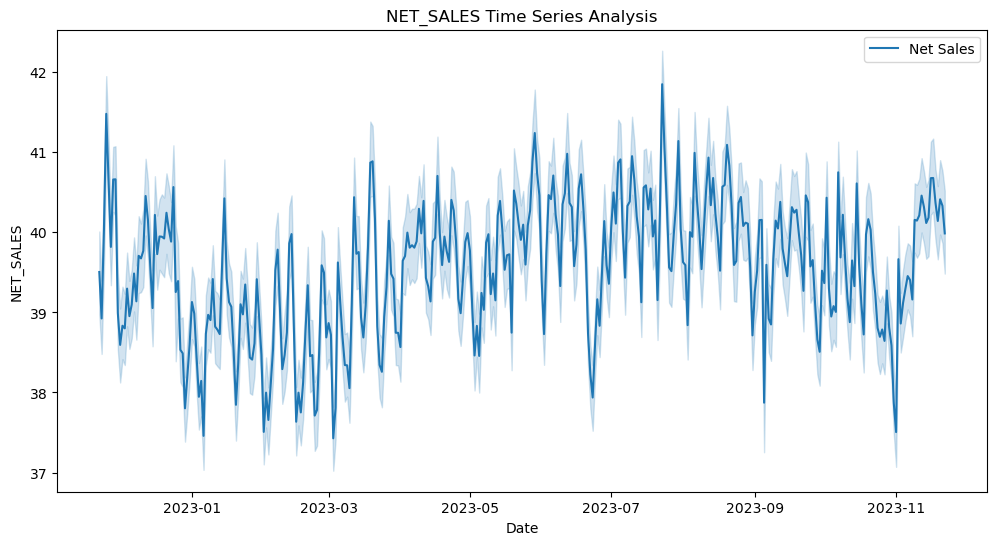

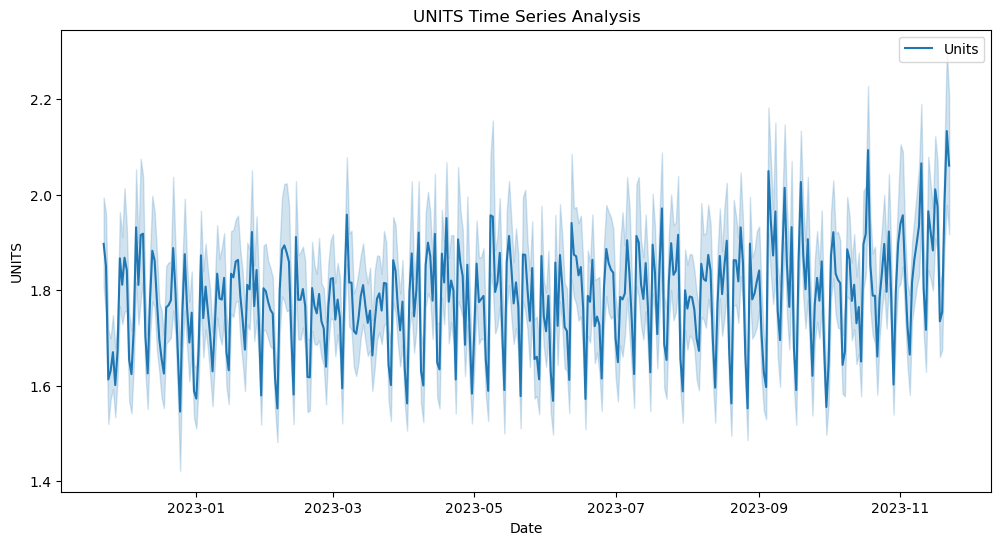

In [9]:
# Population level

plt.figure(figsize=(12, 6))
sns.lineplot(data=data['NET_SALES'], label='Net Sales')
plt.title('NET_SALES Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('NET_SALES')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data['UNITS'], label='Units')
plt.title('UNITS Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('UNITS')
plt.legend()
plt.show()


#### Segment the Data Based on PRODUCT_CATEGORY_LEVEL3 and PRODUCT_CATEGORY_LEVEL1

In [10]:
segment_group_data = data.groupby(['ORDER_PLACED_DTTM', 'PRODUCT_CATEGORY_LEVEL1', 'PRODUCT_CATEGORY_LEVEL3'])[['NET_SALES', 'UNITS']].sum().reset_index()

# Convert 'ORDER_PLACED_DTTM' to datetime
segment_group_data['ORDER_PLACED_DTTM'] = pd.to_datetime(segment_group_data['ORDER_PLACED_DTTM'])

# Set 'ORDER_PLACED_DTTM' as the index for time series analysis
segment_group_data.set_index('ORDER_PLACED_DTTM', inplace=True)

# Combine 'PRODUCT_CATEGORY_LEVEL1' and 'PRODUCT_CATEGORY_LEVEL3' into a new column
segment_group_data['SEGMENT'] = segment_group_data['PRODUCT_CATEGORY_LEVEL1'] + ' - ' + segment_group_data['PRODUCT_CATEGORY_LEVEL3']

# Convert the index to datetime
segment_group_data.index = pd.to_datetime(segment_group_data.index)

# Only keep columns I need
segment_group_data = segment_group_data[['SEGMENT', 'NET_SALES', 'UNITS']]


In [11]:

segment_group_data

,SEGMENT,NET_SALES,UNITS
ORDER_PLACED_DTTM,,,
2022-11-22,Cat - Dry Food,486078.63512,20578.0
2022-11-22,Cat - Flea Combs & Tick Removers,9.98000,3.0
2022-11-22,Cat - Test Kits,250.55000,14.0
2022-11-22,Dog - Dry Food,218262.93549,3400.0
2022-11-22,Dog - Flea Combs & Tick Removers,542.61000,127.0
...,...,...,...
2023-11-22,Dog - Dry Food,173574.53000,2547.0
2023-11-22,Dog - Flea Combs & Tick Removers,410.03000,87.0
2023-11-22,Dog - Poop Scoopers,390.81000,17.0


In [12]:
# # save data
# saved_segment_group_data = segment_group_data
# saved_segment_group_data_file_path = get_absolute_path(
#     'segment_group_data.csv',
#     'data/_small_set_sales_by_date_sku_zip',
#     PROJECT_BASE_DIR
# )

# saved_segment_group_data.to_csv(saved_segment_group_data_file_path)

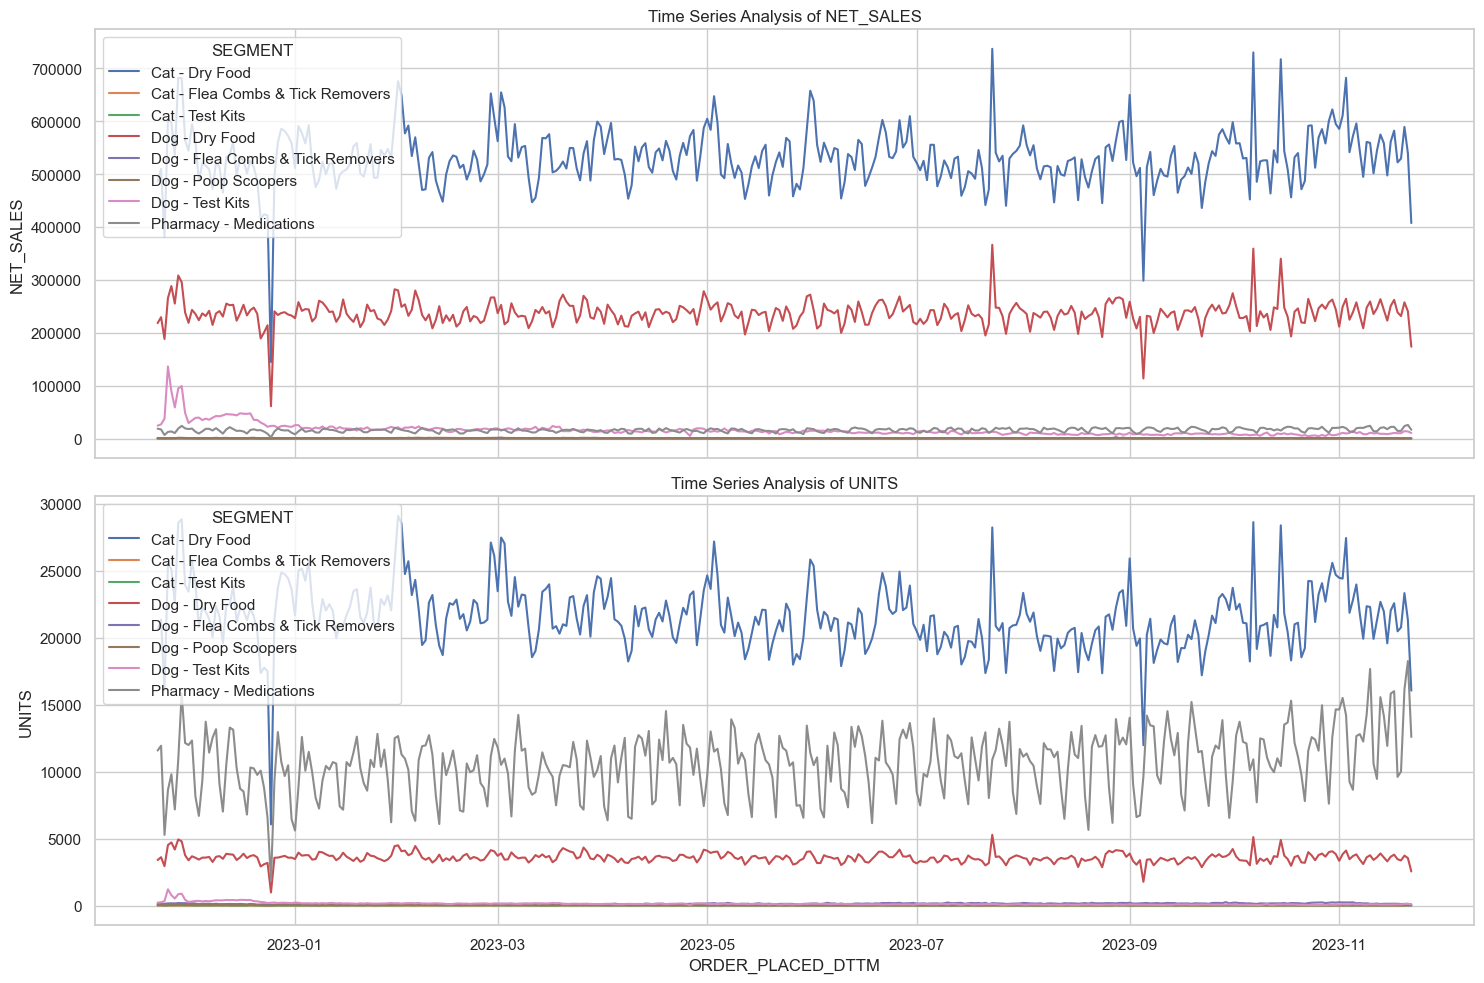

In [13]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Plotting NET_SALES and UNITS in separate subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Time Series Analysis of NET_SALES
sns.lineplot(x=segment_group_data.index, y='NET_SALES', hue='SEGMENT', data=segment_group_data, ax=axes[0])
axes[0].set_title('Time Series Analysis of NET_SALES')
axes[0].set_ylabel('NET_SALES')

# Time Series Analysis of UNITS
sns.lineplot(x=segment_group_data.index, y='UNITS', hue='SEGMENT', data=segment_group_data, ax=axes[1])
axes[1].set_title('Time Series Analysis of UNITS')
axes[1].set_xlabel('ORDER_PLACED_DTTM')
axes[1].set_ylabel('UNITS')

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()

Time series analysis over the `segment_group_data` for
- trends
- seasibaluty
- residuals

We want to perform the time series decomposition at each segment level, we should iterate through each segment and apply the decomposition separately. 


In [14]:
# Initialize empty DataFrames to store results
trend_by_segment = pd.DataFrame()
seasonal_by_segment = pd.DataFrame()
residual_by_segment = pd.DataFrame()

# Add a small constant to avoid zero values for each segment
small_constant = 1e-6

# Iterate through each segment and perform time series decomposition
for _segment, _data in segment_group_data.groupby('SEGMENT'):
    net_sales = _data['NET_SALES'] + small_constant
    result = seasonal_decompose(net_sales, model='additive', period=7)
    
    trend_by_segment[_segment] = result.trend
    seasonal_by_segment[_segment] = result.seasonal
    residual_by_segment[_segment] = result.resid

In [15]:
trend_by_segment

,Cat - Dry Food,Cat - Flea Combs & Tick Removers,Cat - Test Kits,Dog - Dry Food,Dog - Flea Combs & Tick Removers,Dog - Poop Scoopers,Dog - Test Kits,Pharmacy - Medications
ORDER_PLACED_DTTM,,,,,,,,
2022-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-25,542388.847494,NaN,285.631430,250435.324617,617.215244,865.676458,66826.338244,13949.481730
2022-11-26,570250.710458,9.968572,318.441430,261491.351375,647.950958,912.677887,77510.519830,14710.600715
...,...,...,...,...,...,...,...,...
2023-11-18,545744.846091,NaN,149.635715,243396.930001,598.098572,448.087144,10797.048572,20010.147144
2023-11-19,532892.167148,NaN,149.974287,236344.714287,565.182858,440.730001,11123.145715,19833.881430
2023-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
seasonal_by_segment

,Cat - Dry Food,Cat - Flea Combs & Tick Removers,Cat - Test Kits,Dog - Dry Food,Dog - Flea Combs & Tick Removers,Dog - Poop Scoopers,Dog - Test Kits,Pharmacy - Medications
ORDER_PLACED_DTTM,,,,,,,,
2022-11-22,671.444855,0.443561,19.035017,1771.310539,5.095644,-31.306569,-196.836100,2631.760197
2022-11-23,15214.872004,-0.576639,5.620849,-1080.501460,21.006258,52.973051,-1218.549106,1656.311191
2022-11-24,10562.702905,-1.992996,12.450615,-3860.780976,-2.935378,-11.975918,-1137.198087,1562.535711
2022-11-25,-9514.127007,NaN,-19.536536,-13128.145483,23.390631,-60.219469,966.954407,1190.874297
2022-11-26,-19342.344587,-0.263448,-18.536641,-4390.317990,-43.626042,-88.635023,749.691659,-3224.840022
...,...,...,...,...,...,...,...,...
2023-11-18,-19342.344587,1.358763,-19.536536,-4390.317990,-43.626042,-88.635023,749.691659,-3224.840022
2023-11-19,-10801.977171,-0.799395,-18.536641,8888.007536,-22.474927,32.729445,594.339491,-5224.232106
2023-11-20,13209.429002,0.443561,-19.497907,11800.427835,19.543814,106.434482,241.597736,1407.590732


In [17]:
residual_by_segment

,Cat - Dry Food,Cat - Flea Combs & Tick Removers,Cat - Test Kits,Dog - Dry Food,Dog - Flea Combs & Tick Removers,Dog - Poop Scoopers,Dog - Test Kits,Pharmacy - Medications
ORDER_PLACED_DTTM,,,,,,,,
2022-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-25,70480.426534,NaN,28.655107,28284.908667,-1.365874,20.773012,68435.804150,-2580.766025
2022-11-26,46258.543010,0.244876,-3.434788,31137.812626,86.138185,-24.306463,11136.918512,1936.334308
...,...,...,...,...,...,...,...,...
2023-11-18,-4335.611493,NaN,14.560821,-546.642010,51.397471,-3.662120,-1503.440231,-2422.377121
2023-11-19,7114.160024,NaN,-84.107645,-13748.231821,9.762070,19.770555,-1631.585205,-101.829322
2023-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


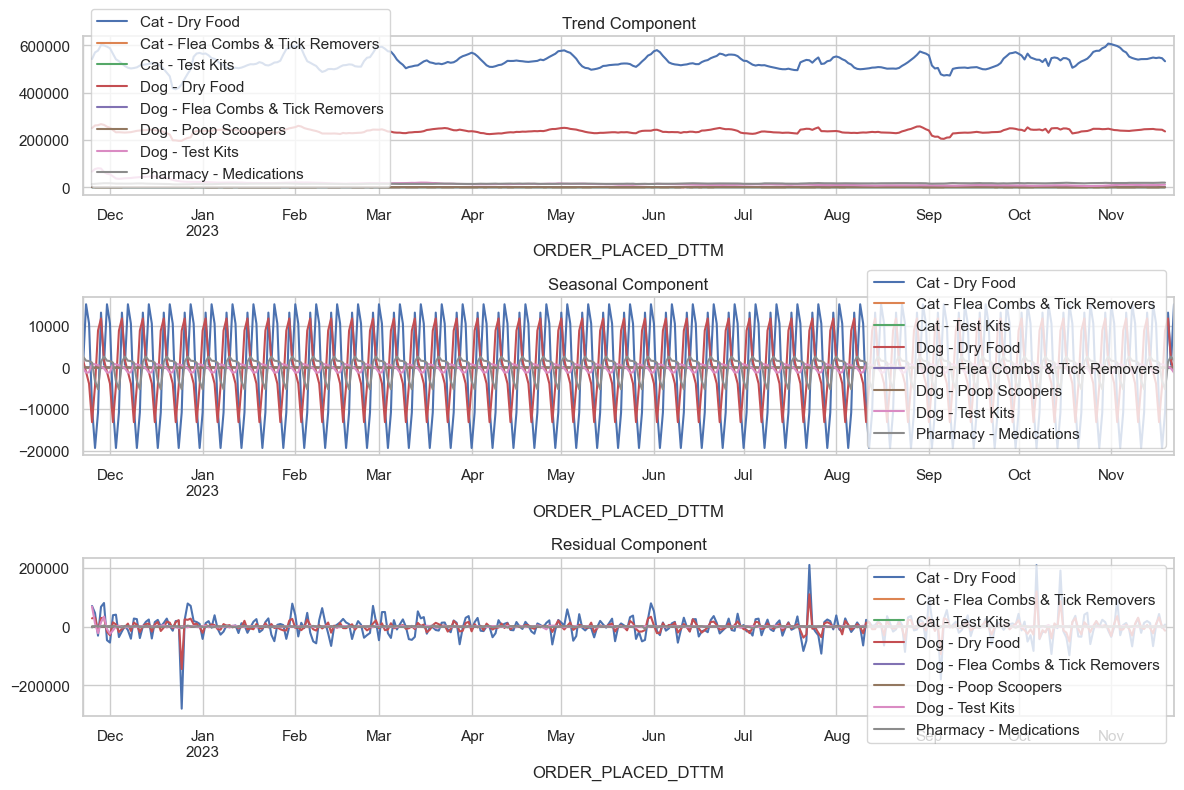

In [18]:
# Plot the decomposed components for all segments
plt.figure(figsize=(12, 8))

# Plot trend for all segments
plt.subplot(3, 1, 1)
trend_by_segment.plot(ax=plt.gca())
plt.title('Trend Component')

# Plot seasonal for all segments
plt.subplot(3, 1, 2)
seasonal_by_segment.plot(ax=plt.gca())
plt.title('Seasonal Component')

# Plot residual for all segments
plt.subplot(3, 1, 3)
residual_by_segment.plot(ax=plt.gca())
plt.title('Residual Component')

plt.tight_layout()
plt.show()

#### Generate a Subset DataFrame for Randomly Selected IDs

In [19]:
subset_data = data[data['PRODUCT_PART_NUMBER'].isin(randomly_selected_ids)][['PRODUCT_PART_NUMBER', 'NET_SALES', 'UNITS']]


In [20]:
subset_data.PRODUCT_PART_NUMBER.unique()

array([112845, 133299, 160766, 207634, 215371])

In [21]:
subset_data.head(3)

,PRODUCT_PART_NUMBER,NET_SALES,UNITS
ORDER_PLACED_DTTM,,,
2022-11-22,112845,0.00,1.0
2022-11-22,112845,38.96,2.0
2022-11-22,112845,74.81,4.0


In [22]:
# save data
saved_subset_data = subset_data
saved_subset_data_file_path = get_absolute_path(
    'subset_data.csv',
    'data/_small_set_sales_by_date_sku_zip',
    PROJECT_BASE_DIR
)

saved_subset_data.to_csv(saved_subset_data_file_path)

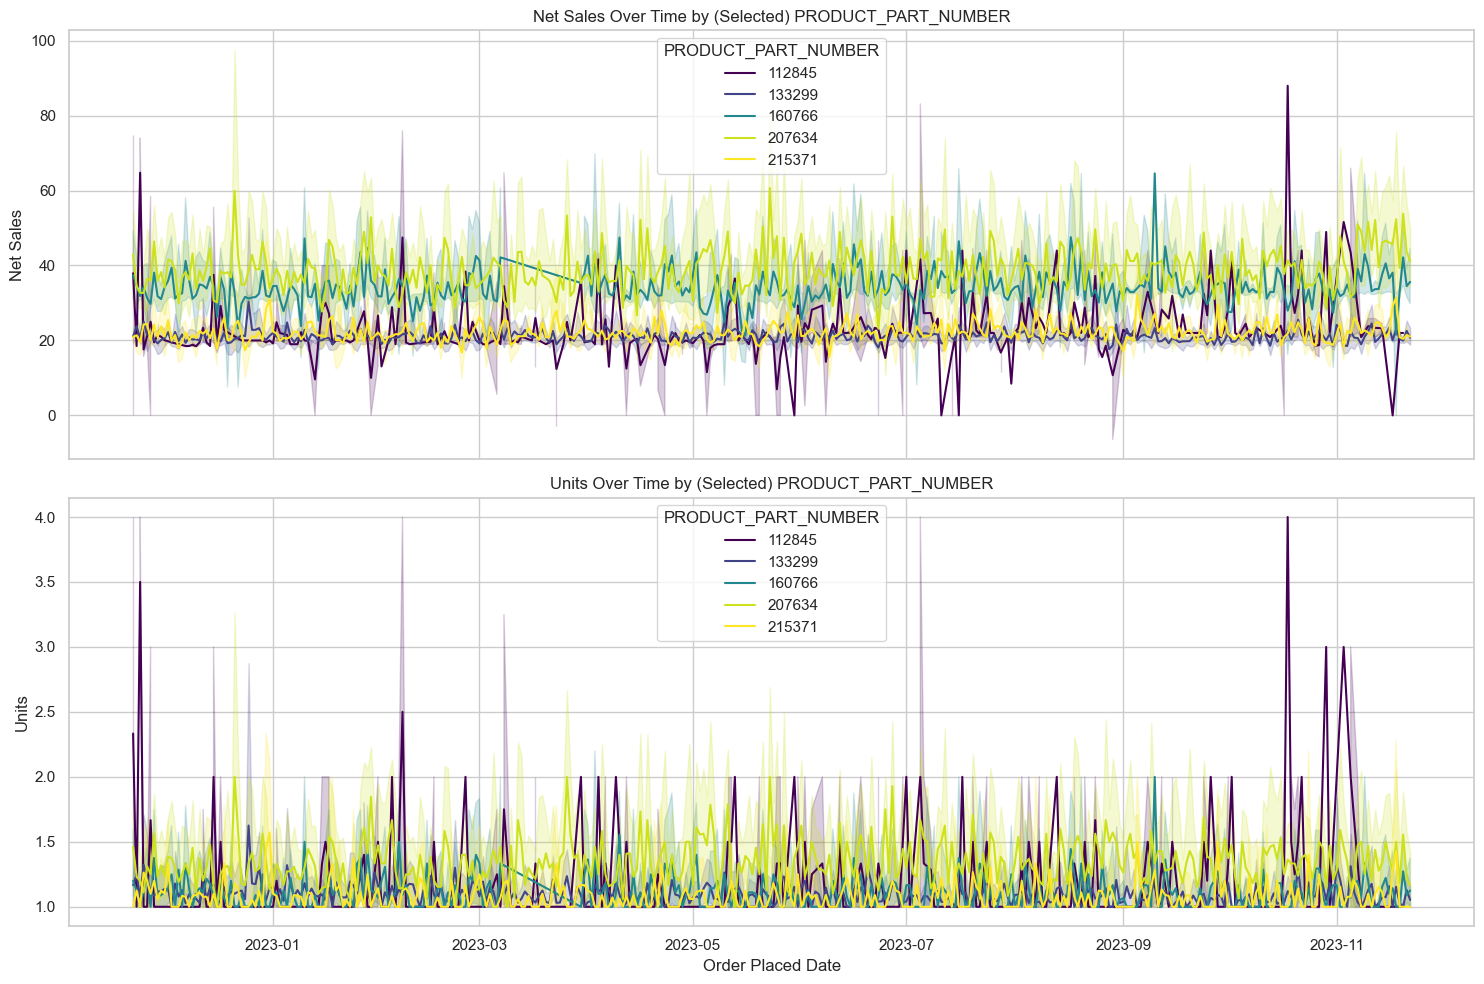

In [23]:
# Time Series Visualization
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)

# Plot Net Sales
sns.lineplot(x=subset_data.index, y=subset_data['NET_SALES'], hue=subset_data['PRODUCT_PART_NUMBER'], ax=axes[0], palette='viridis')
axes[0].set_title('Net Sales Over Time by (Selected) PRODUCT_PART_NUMBER')
axes[0].set_ylabel('Net Sales')

# Plot Units
sns.lineplot(x=subset_data.index, y=subset_data['UNITS'], hue=subset_data['PRODUCT_PART_NUMBER'], ax=axes[1], palette='viridis')
axes[1].set_title('Units Over Time by (Selected) PRODUCT_PART_NUMBER')
axes[1].set_xlabel('Order Placed Date')
axes[1].set_ylabel('Units')

plt.tight_layout()
plt.show()

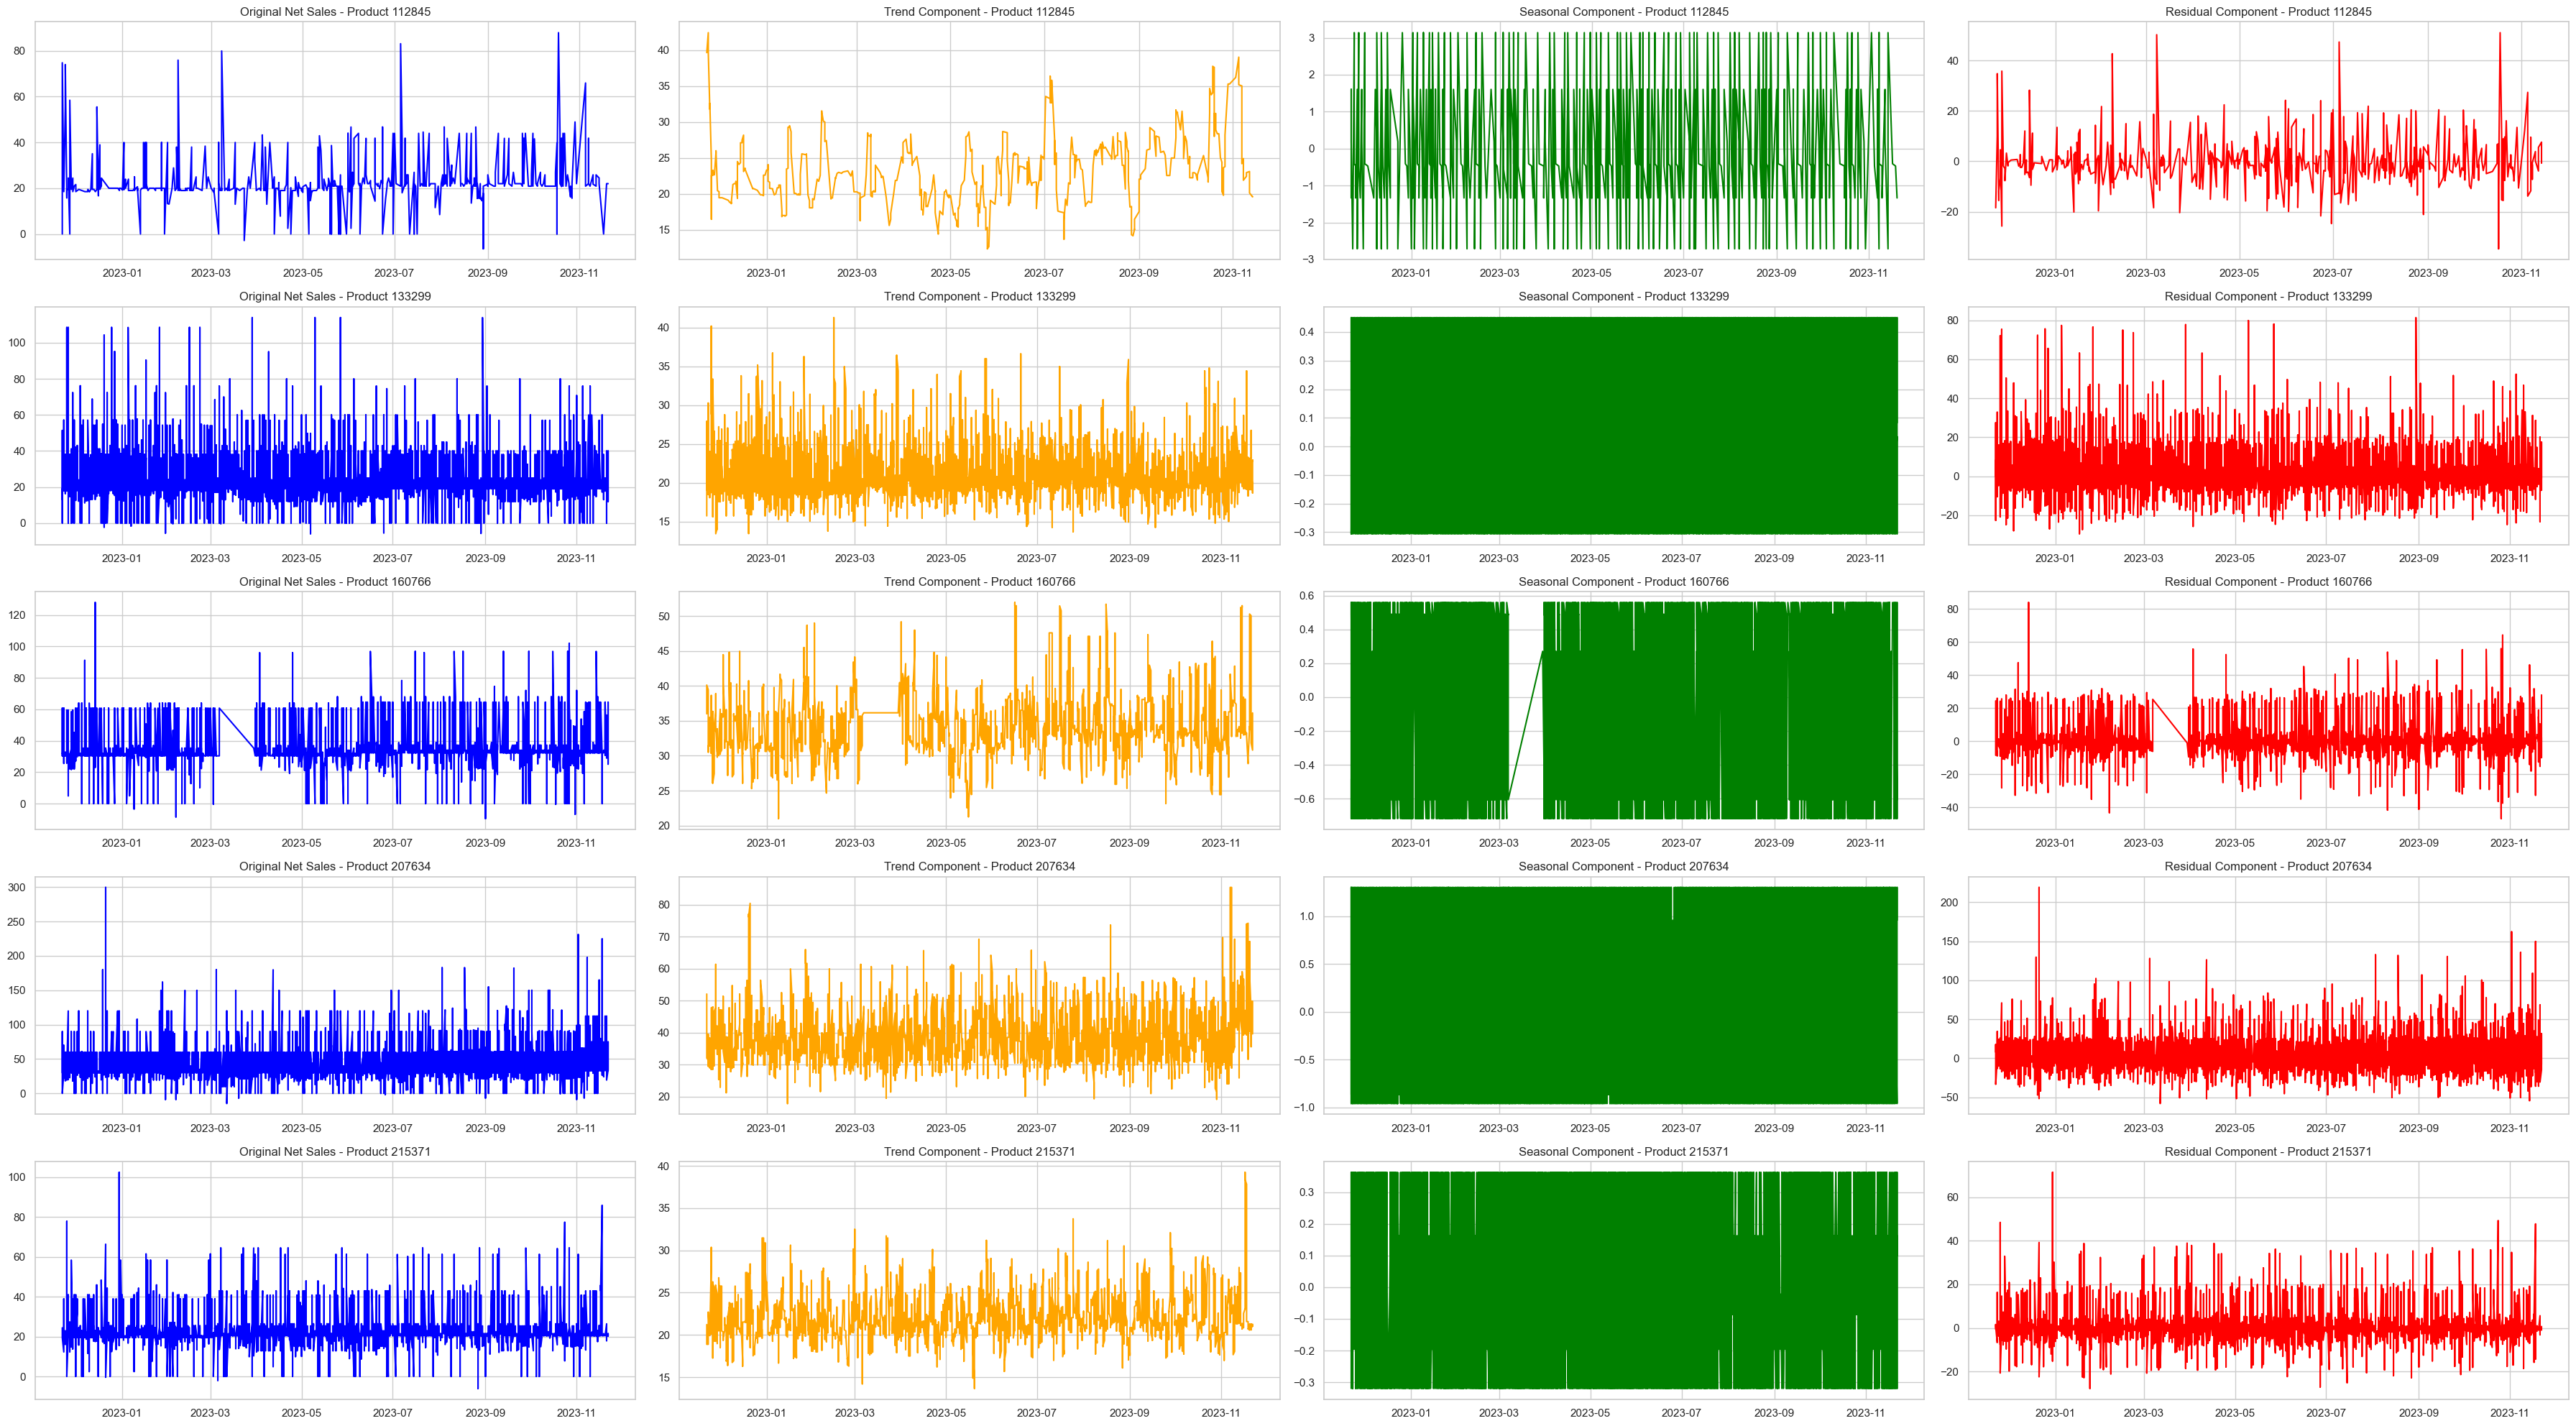

In [24]:
# Assuming that 'ORDER_PLACED_DTTM' is a datetime index, if not, convert it to datetime
subset_data.index = pd.to_datetime(subset_data.index)

# Create subplots for each PRODUCT_PART_NUMBER
unique_products = subset_data['PRODUCT_PART_NUMBER'].unique()
num_products = len(unique_products)

# Plot the decomposed components for each PRODUCT_PART_NUMBER
plt.figure(figsize=(36, 4 * num_products))

for i, product_number in enumerate(unique_products, start=1):
    product_data = subset_data[subset_data['PRODUCT_PART_NUMBER'] == product_number]['NET_SALES']

    # Decompose time series into trend, seasonal, and residual components
    result = seasonal_decompose(product_data, model='additive', period=7)
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    plt.subplot(num_products, 4, 4 * (i - 1) + 1)
    plt.plot(product_data, label='Original', color='blue')
    plt.title(f'Original Net Sales - Product {product_number}')

    plt.subplot(num_products, 4, 4 * (i - 1) + 2)
    plt.plot(trend, label='Trend', color='orange')
    plt.title(f'Trend Component - Product {product_number}')

    plt.subplot(num_products, 4, 4 * (i - 1) + 3)
    plt.plot(seasonal, label='Seasonal', color='green')
    plt.title(f'Seasonal Component - Product {product_number}')

    plt.subplot(num_products, 4, 4 * (i - 1) + 4)
    plt.plot(residual, label='Residual', color='red')
    plt.title(f'Residual Component - Product {product_number}')

plt.tight_layout()
plt.show()

### 3. Box Plots for Outlier Detection
- Use boxplots to identofy outliers in `NET_SALES` and `UNITS`

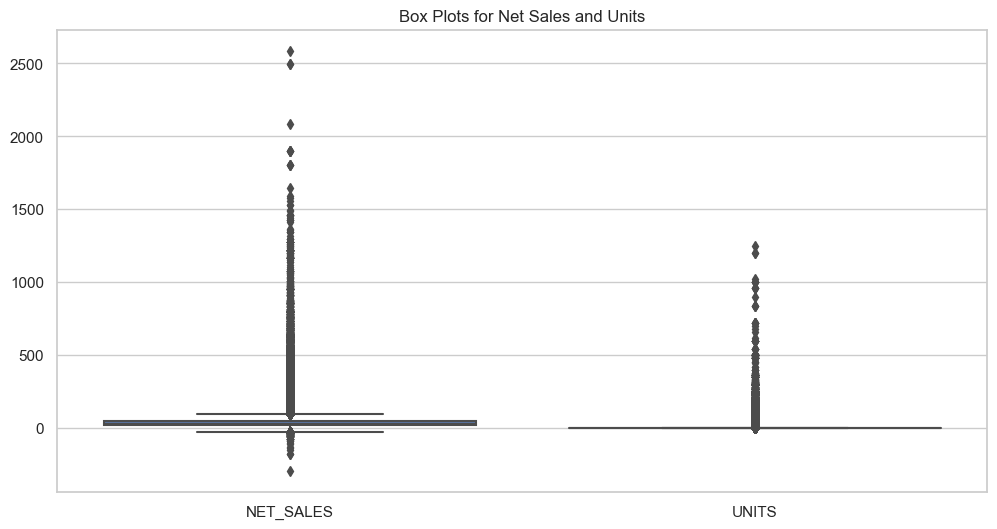

In [25]:
# Box plots for 'NET_SALES' and 'UNITS'
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['NET_SALES', 'UNITS']])
plt.title('Box Plots for Net Sales and Units')
plt.show()


In [27]:
# # Box Plots for 'NET_SALES' and 'UNITS' by group
# for column in group_columns:
#     plt.figure(figsize=(12, 8))
#     sns.boxplot(x=column, y='NET_SALES', data=data)
#     plt.title(f'Box Plots for Net Sales by {column}')
#     plt.xlabel(column)
#     plt.ylabel('Net Sales')
#     plt.show()

#     plt.figure(figsize=(12, 8))
#     sns.boxplot(x=column, y='UNITS', data=data)
#     plt.title(f'Box Plots for Units by {column}')
#     plt.xlabel(column)
#     plt.ylabel('Units')
#     plt.show()

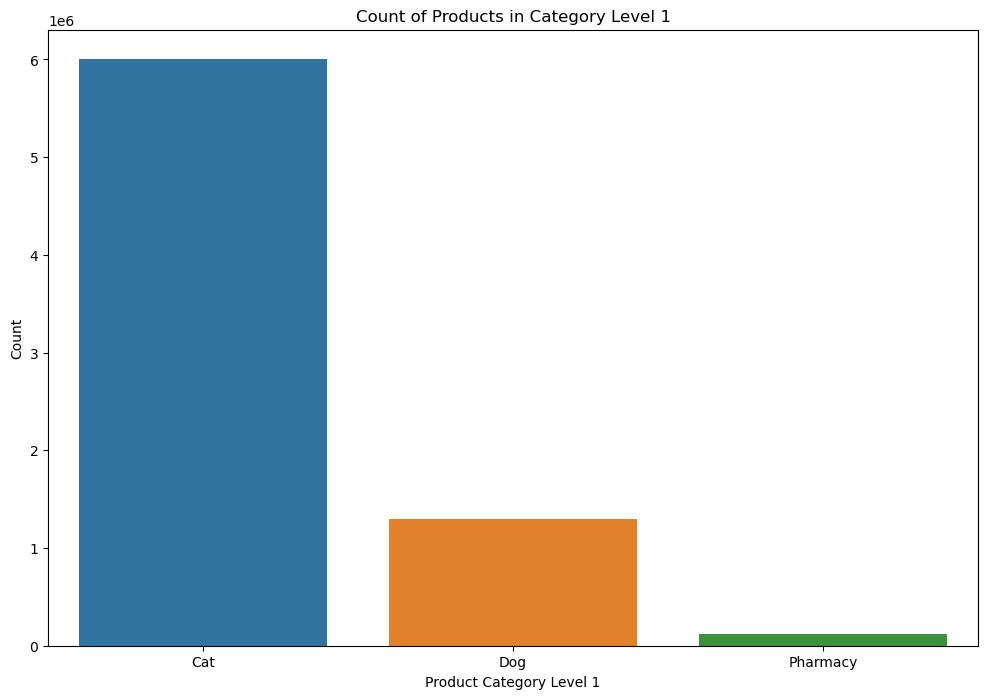

In [ ]:
# Explore Categorical Features
plt.figure(figsize=(12, 8))
sns.countplot(x='PRODUCT_CATEGORY_LEVEL1', data=data)
plt.title('Count of Products in Category Level 1')
plt.xlabel('Product Category Level 1')
plt.ylabel('Count')
plt.show()


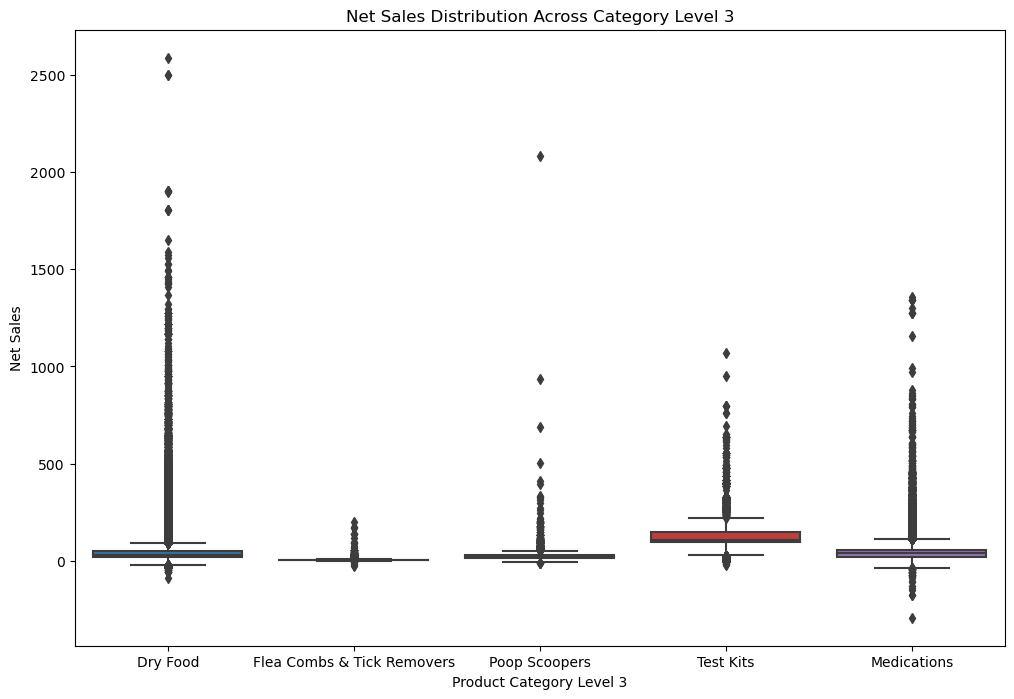

In [ ]:

# Explore Relationships with Categorical Features
plt.figure(figsize=(12, 8))
sns.boxplot(x='PRODUCT_CATEGORY_LEVEL3', y='NET_SALES', data=data)
plt.title('Net Sales Distribution Across Category Level 3')
plt.xlabel('Product Category Level 3')
plt.ylabel('Net Sales')
plt.show()